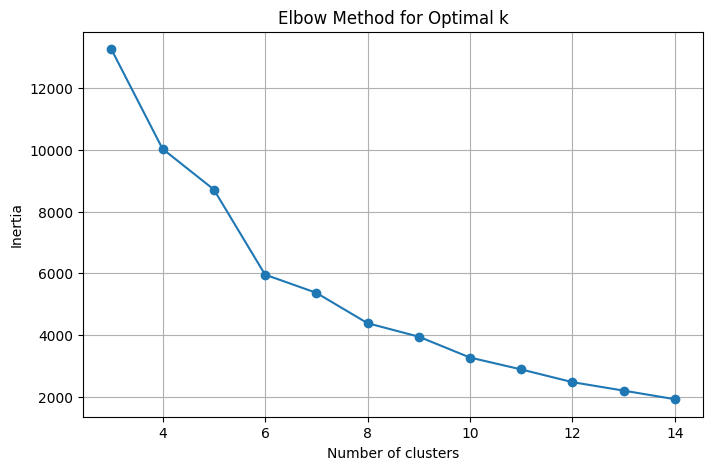

In [1]:
# Import library pandas
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')

# Drop kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)

# Penerapan RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
RFM_robust = robust_scaler.fit_transform(RFM_km)
RFM_robust = pd.DataFrame(RFM_robust)
RFM_robust.columns = ["Frequency", "Recency", "Monetary"]

# Import library K-Means
from sklearn.cluster import KMeans

# Deklarasi variable wss
wss = []

# Melakukan k-means berkali-kali dengan nilai k yang berbeda-beda dari 3 sampai 15
for k in range(3, 15):
    k_means = KMeans(n_clusters=k, random_state=0)
    model = k_means.fit(RFM_robust)
    wss.append(k_means.inertia_)

# Import library matplotlib.pyplot
import matplotlib.pyplot as plt

# Mengkonversi hasil ke dalam data frame, kemudian menampilkannya dalam bentuk plot
frame = pd.DataFrame({"Cluster": range(3, 15), "WSS": wss})
plt.figure(figsize=(8, 5))
plt.plot(frame["Cluster"], frame["WSS"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


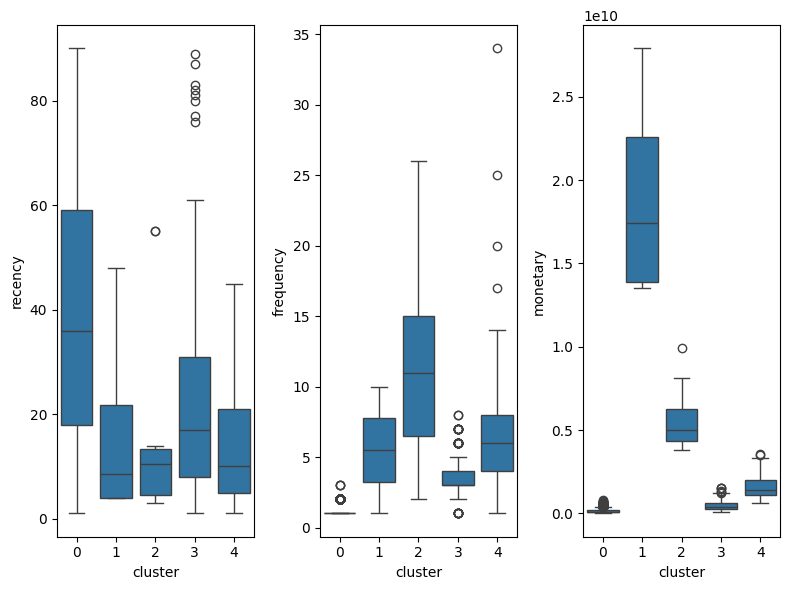

In [3]:
#Menjalankan k-means dengan nilai k = 5
k_means = KMeans(n_clusters=5, random_state=0)
k_means.fit(RFM_robust)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

#Menggabungkan dataframe data dan hasil label clustering
RFM_k5 = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

#Import library matplotlib.pyplot dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Menampilkan boxplot dari RFM_k5
fig, ax = plt.subplots(1, 3, figsize=(8,6))
sns.boxplot(x="cluster", y="recency", data=RFM_k5, ax=ax[0])
sns.boxplot(x="cluster", y="frequency", data=RFM_k5, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_k5, ax=ax[2])
plt.tight_layout()
plt.show()

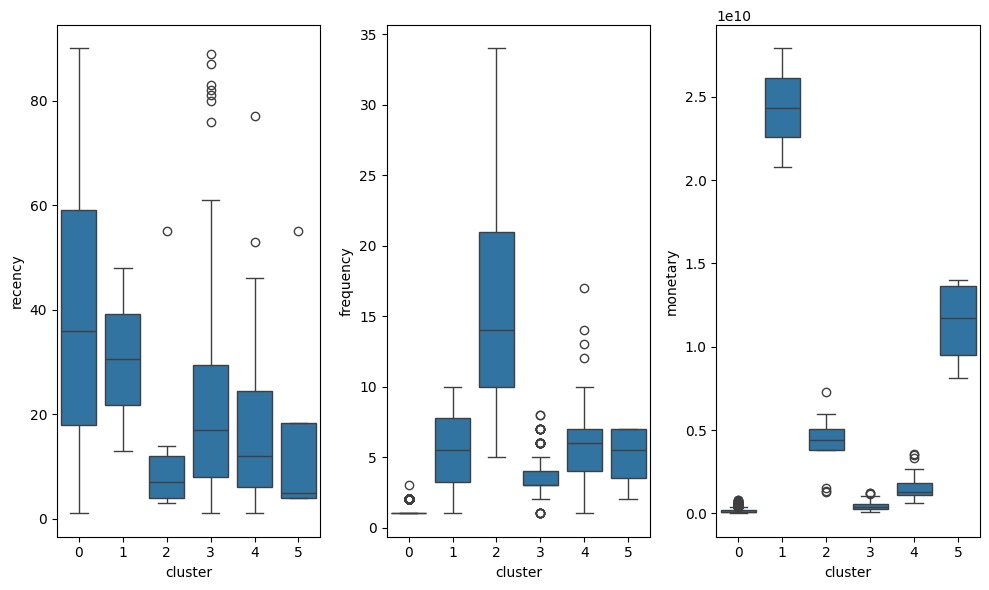

In [4]:
#Menjalankan k-means dengan nilai k = 6
k_means = KMeans(n_clusters=6, random_state=0)
k_means.fit(RFM_robust)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

#Menggabungkan dataframe data dan hasil label clustering
RFM_k6 = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

#Import library matplotlib.pyplot dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Menampilkan boxplot dari RFM_k6
fig, ax = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(x="cluster", y="recency", data=RFM_k6, ax=ax[0])
sns.boxplot(x="cluster", y="frequency", data=RFM_k6, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_k6, ax=ax[2])
plt.tight_layout()
plt.show()